# Time Series Forecasting with Python Dart

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from darts import TimeSeries
from typing import Optional, Callable
from darts import models, metrics, backtesting
from darts.preprocessing import ScalerWrapper
from darts.utils import missing_values
%matplotlib inline

In [3]:
pd.plotting.register_matplotlib_converters()


# Dart

In [28]:
df = pd.read_csv("meli_data.csv")
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df.head()

,date,campaign,campaign_id,target_roas,cost,impressions,clicks,ctr,conversions,conversion_value,...,impressions_slope_14_21,clicks_slope_14_21,ctr_slope_14_21,conversions_slope_14_21,conversion_value_slope_14_21,gmv_matt_slope_14_21,gmv_shapley_slope_14_21,gmv_stimulus_slope_14_21,cost_slope_14_21,site
0,2020-01-01,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,35000.0,3714.71,6115306.0,119391.0,1.95,1264.49,275264.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mlb
1,2020-01-02,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,35000.0,6481.04,10483061.0,211379.0,2.02,2920.71,667247.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mlb
2,2020-01-03,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,35000.0,5858.64,10210427.0,197818.0,1.94,2495.05,543083.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mlb
3,2020-01-04,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,35000.0,6031.34,9646553.0,189609.0,1.97,2325.83,447982.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mlb
4,2020-01-05,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,35000.0,6204.97,9702296.0,193787.0,2.00,2437.50,450986.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mlb


In [29]:
df.campaign_id.unique()

array([6542458279, 6542484841, 6542484859, 6542484922, 6542489221,
       6542508691, 6542509144, 6542509648, 6542510092, 6542512723,
       6542513413, 6542745839, 6542746532, 6542746973, 6542860500,
       6542933197, 6542939187, 6542955276, 6543179201, 6543332358,
       6543359910, 6543360237, 6543165727, 6543208723, 6543245170,
       6543247363, 6543386777, 6543404282, 6543465836, 6543520502,
       6543615747, 8880806564, 8880876122, 8902518134, 8902883960,
       8907821731, 9860914691, 9868960480, 9869572305, 9869794695,
       9869908536, 6556522519, 6556523710, 6556524151, 6556524160,
       6556524181, 6556524184, 6556530361, 6556530382, 6556530394,
       6556530604, 6556530619, 6556629042, 6556629774, 6556629777,
       6556629813, 6556630005, 6557890481, 6557890484, 6557890487,
       6557890535, 6557890682, 6557890688, 6557890781, 6557890790,
       6557890793, 6737600630, 6737600633, 6737600636, 6740938753,
       6740938756, 6740938780, 6740938783, 6740939038, 6740939

In [33]:
df_test = df[df.campaign_id == 6542458279]
df_test.tail()

,date,campaign,campaign_id,target_roas,cost,impressions,clicks,ctr,conversions,conversion_value,...,impressions_slope_14_21,clicks_slope_14_21,ctr_slope_14_21,conversions_slope_14_21,conversion_value_slope_14_21,gmv_matt_slope_14_21,gmv_shapley_slope_14_21,gmv_stimulus_slope_14_21,cost_slope_14_21,site
196,2020-07-15,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,16821.0,18280.65,23059358.0,426707.0,1.85,6242.25,1371954.80,...,-0.138738,-0.121016,0.016667,-0.208915,-0.278320,-0.067455,0.014692,-0.104663,-0.222408,mlb
197,2020-07-16,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,16821.0,18862.55,22955383.0,433834.0,1.89,5991.68,1385781.40,...,-0.130029,-0.131087,0.000000,-0.160822,-0.188199,-0.048722,0.056533,-0.077734,-0.205695,mlb
198,2020-07-17,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,16821.0,16193.08,20987981.0,383724.0,1.83,4410.90,1040084.34,...,-0.088774,-0.087874,0.000000,-0.021866,-0.017460,0.055597,0.129896,0.021211,-0.128163,mlb
199,2020-07-18,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,16821.0,15227.17,18950665.0,362079.0,1.91,3179.97,755421.18,...,-0.054994,-0.070924,-0.016216,0.060805,0.043193,0.063197,0.093467,0.059479,0.017316,mlb
200,2020-07-19,MLB_ML_G_AO_MLB263532-Ferramentas e Construcao...,6542458279,16821.0,16256.97,20507649.0,394241.0,1.92,3820.65,815943.88,...,0.052052,0.033919,-0.015957,0.188142,0.143703,0.093155,0.130993,0.098577,0.187797,mlb


## Plot one campain

<AxesSubplot:xlabel='date'>

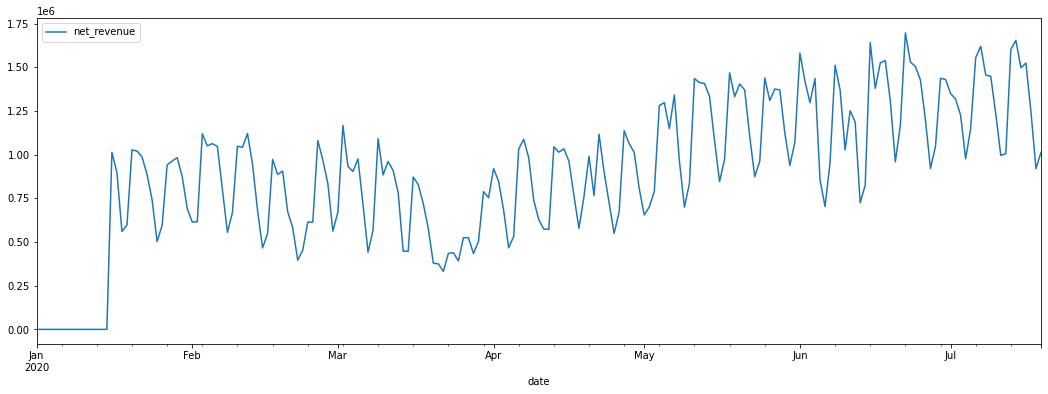

In [38]:
df_test.plot(x="date", y=["net_revenue"], figsize=(18,6))

## Check if missing values and drop Zero values
TimeSeries add missing date with nan values, and you have to fillna values with `auto_fillna` function.

Will drop zero values

In [56]:
df_test  =df_test[df_test.net_revenue != 0]

In [57]:
date_division = "20200625"
series = TimeSeries.from_dataframe(df_test, "date", "net_revenue" )

series = missing_values.auto_fillna(series, method="slinear")
train, val = series.split_after(pd.Timestamp(date_division))
len(series), len(df_test)

(186, 186)

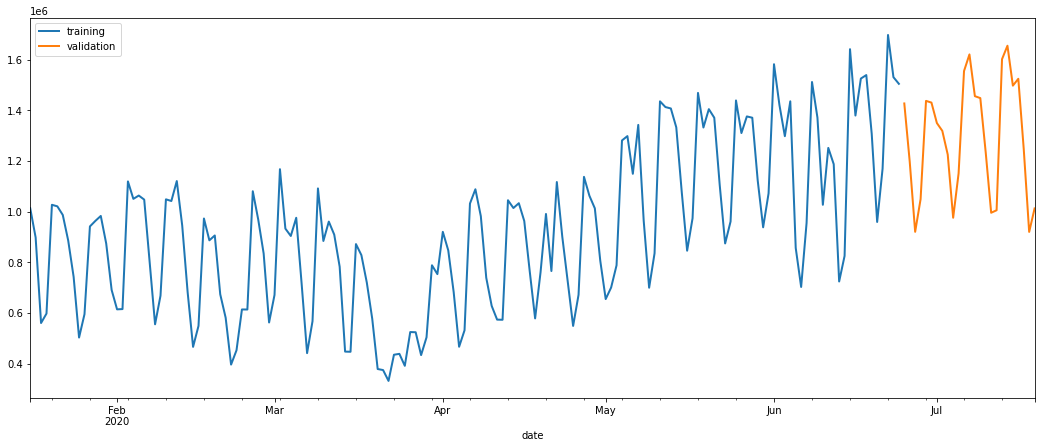

In [59]:
train, val = series.split_before(pd.Timestamp(date_division))
train.plot(lw=2, label='training', figsize=(18,7))
val.plot(lw=2, label='validation', figsize=(18,7))
plt.legend();

## Prophet

In [62]:
model = models.Prophet()
model.fit(train)
prediction = model.predict(len(val))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 0, 'Year')

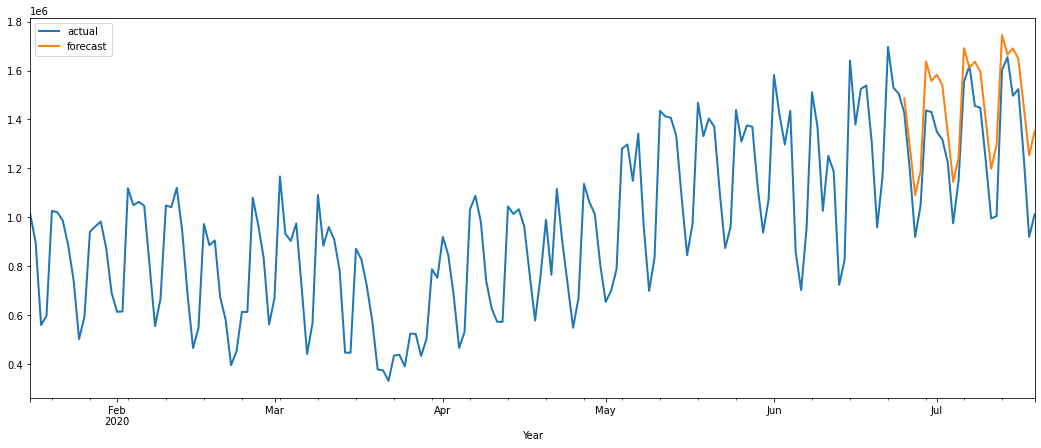

In [63]:
series.plot(label="actual", lw=2, figsize=(18,7))
prediction.plot(label="forecast", lw=2, figsize=(18,7))
plt.legend()
plt.xlabel("Year")

### Add holidays

In [64]:
model = models.Prophet(weekly_seasonality=True, daily_seasonality=False)
train.add_holidays(country_code="BR")
model.fit(train)
prediction_prophet = model.predict(len(val))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Text(0.5, 0, 'Year')

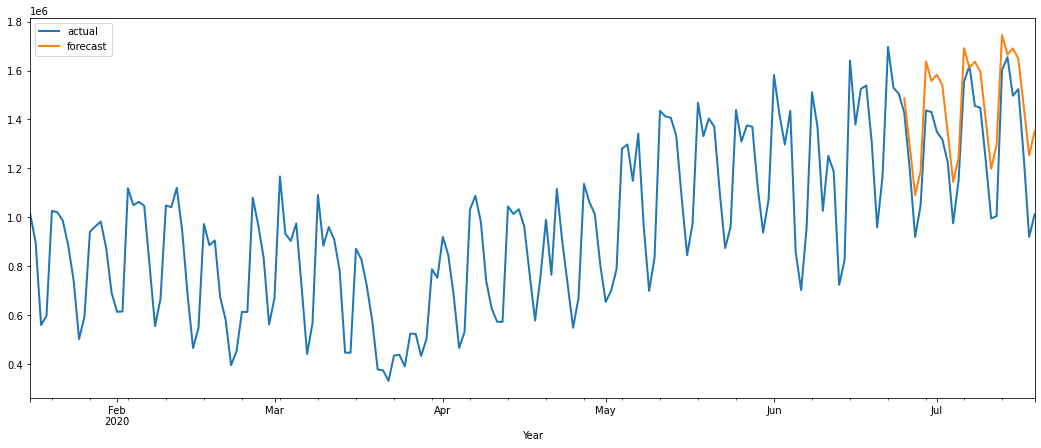

In [65]:
series.plot(label="actual", lw=2, figsize=(18,7))
prediction_prophet.plot(label="forecast", lw=2, figsize=(18,7))
plt.legend()
plt.xlabel("Year")

In [66]:
print('The MAPE for Prophet is: {:.2f}.'.format(metrics.mape(val, prediction_prophet)))

The MAPE for Prophet is: 13.93.


## Theta
The model Theta contains an implementation of Assimakopoulos and Nikolopoulos' Theta method. This method has known great success, particularly in the M3-competition.
[Link](https://robjhyndman.com/papers/Theta.pdf)


In [67]:
# Search for the best theta parameter, by trying 50 different values
thetas = np.linspace(-10, 10, 50)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = models.Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = metrics.mape(val, pred_theta)
    
    if res < best_mape:
        best_mape = res
        best_theta = theta
best_theta

[2020-07-24 13:21:47,066] INFO | darts.models.theta | Theta model inferred seasonality of training series: 7
INFO:darts.models.theta:Theta model inferred seasonality of training series: 7
[2020-07-24 13:21:47,176] INFO | darts.models.theta | Theta model inferred seasonality of training series: 7
INFO:darts.models.theta:Theta model inferred seasonality of training series: 7
[2020-07-24 13:21:47,253] INFO | darts.models.theta | Theta model inferred seasonality of training series: 7
INFO:darts.models.theta:Theta model inferred seasonality of training series: 7
[2020-07-24 13:21:47,324] INFO | darts.models.theta | Theta model inferred seasonality of training series: 7
INFO:darts.models.theta:Theta model inferred seasonality of training series: 7
[2020-07-24 13:21:47,402] INFO | darts.models.theta | Theta model inferred seasonality of training series: 7
INFO:darts.models.theta:Theta model inferred seasonality of training series: 7
[2020-07-24 13:21:47,472] INFO | darts.models.theta | Theta 

-0.612244897959183

In [68]:
best_theta_model = models.Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE is: {:.2f}, with theta = {}.'.format(metrics.mape(val, pred_best_theta), best_theta))

[2020-07-24 13:22:05,975] INFO | darts.models.theta | Theta model inferred seasonality of training series: 7
INFO:darts.models.theta:Theta model inferred seasonality of training series: 7
The MAPE is: 5.84, with theta = -0.612244897959183.


Text(0.5, 0, 'Year')

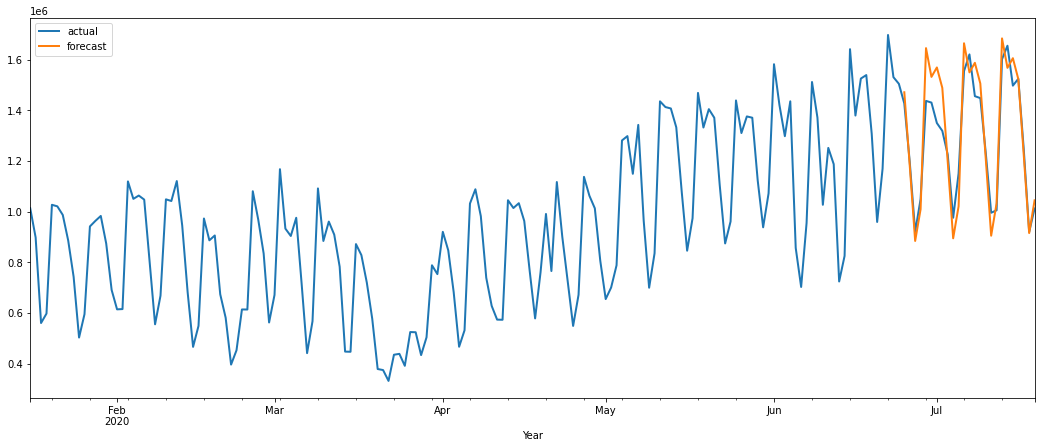

In [70]:
series.plot(label="actual", lw=2, figsize=(18,7))
pred_best_theta.plot(label="forecast", lw=2, figsize=(18,7))
plt.legend()
plt.xlabel("Year")

### Ensembling several predictions
For instance, in our example of a "less naive" model above, we manually combined a naive seasonal model with a naive drift model. Here, we will try to find such combinations in an automated way, using RegressionModels. A regression model is a model that predicts a target time series from a bunch of features time series. If the features time series are themselves obtained from forecasting models, their future (predicted) values can be combined using the regression model to obtain a final forecast.


Here, we will first compute the historical predictions two naive seasonal models (with 7 and 14 days seasonality), and naive drift model. To compute the historical predictions, we can simply reuse the backtest_forecasting() method:

In [76]:
date_division = '20200412'	

models_naive = [models.NaiveSeasonal(15), models.NaiveSeasonal(30), models.NaiveDrift()]

model_predictions = [backtesting.backtest_forecasting(series, m, pd.Timestamp(date_division), fcast_horizon_n=14, verbose=True) for m in models_naive]

In [79]:
""" We build the regression model, and tell it to use the 12 preceding points to fit the regression
"""
regr_model = models.StandardRegressionModel(train_n_points=12)

""" Our target series is what we want to predict (the actual data)
    It has to have the same time index as the features series:
"""
series_target = series.slice_intersect(model_predictions[0])

""" Here we backtest our regression model
"""
regr_date_division = '20200625'	
ensemble_pred = backtesting.backtest_regression(model_predictions, series_target, regr_model, 
                                    pd.Timestamp(regr_date_division), fcast_horizon_n=3, verbose=True)



MAPE Error ensemble: 12.11%


Text(0.5, 0, 'Year')

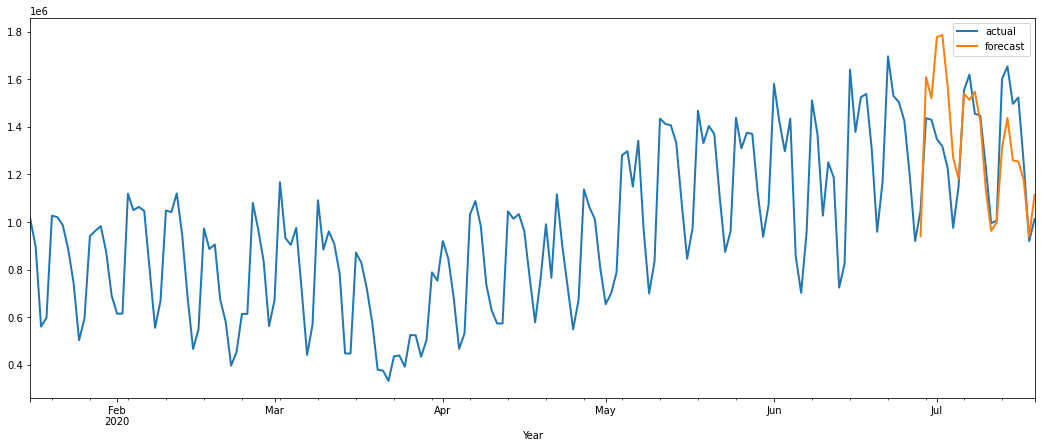

In [80]:
print('MAPE Error ensemble: {:.2f}%'.format(metrics.mape(series, ensemble_pred)))
series.plot(label="actual", lw=2, figsize=(18,7))
ensemble_pred.plot(label="forecast", lw=2, figsize=(18,7))
plt.legend()
plt.xlabel("Year")

### Try explore models function

In [81]:
date_division_val = "20200414"
date_division_test = "20200625"
train, val_test = series.split_after(pd.Timestamp(date_division_val))
val, test = val_test.split_after(pd.Timestamp(date_division_test))
len(train) , len(val), len(test) 

(90, 72, 24)

/home/fabian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fabian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fabian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
[2020-07-24 13:26:55,862] INFO | darts.backtesting.backtesting | Chosen parameters: {'trend': 'additive', 'seasonal': 'multiplicative', 'seasonal_periods': 12}
INFO:darts.backtesting.backtesting:Chosen parameters: {'trend': 'additive', 'seasonal': 'multiplicative', 'seasonal_periods': 12}
[2020-07-24 13:26:57,716] INFO | darts.backtesting.backtesting | Chosen parameters: {'K': 2}
INFO:darts.backtesting.backtesting:Chosen parameters: {'K': 2}
[2020-07-24

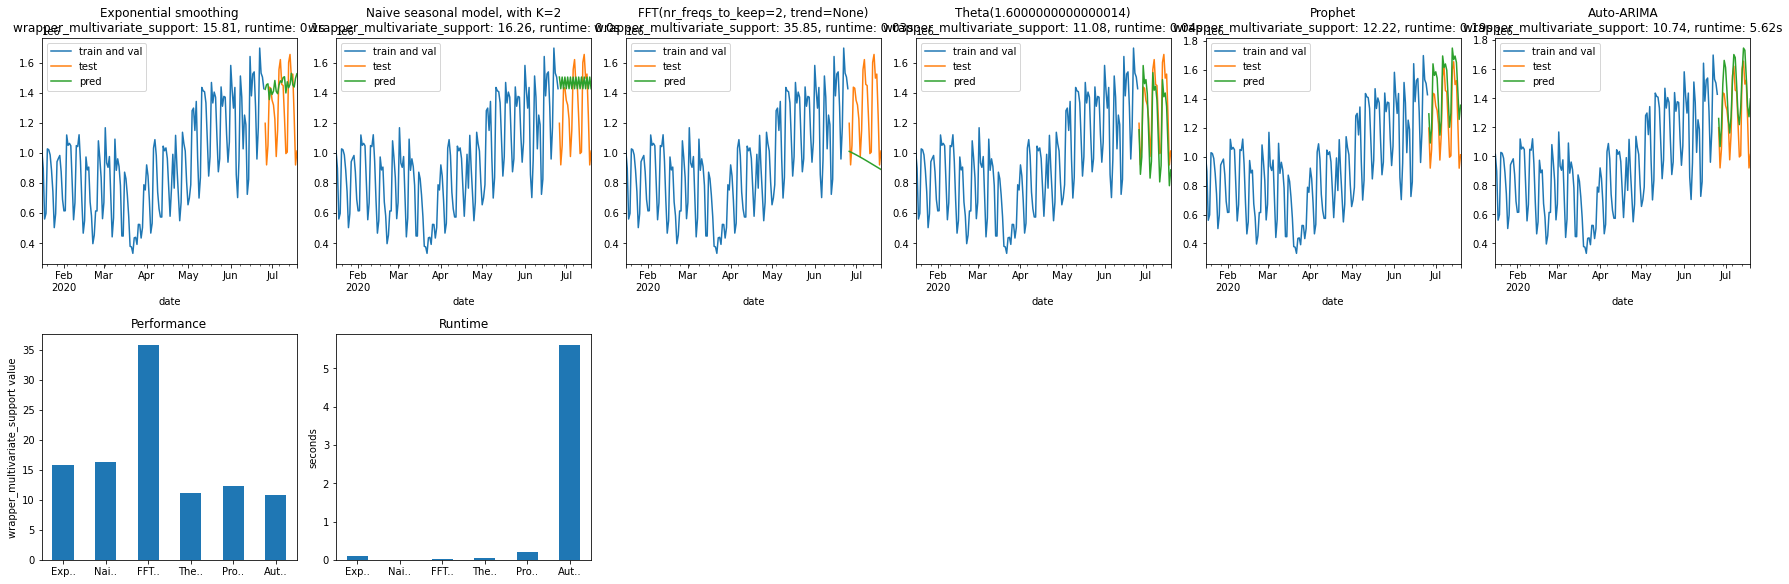

In [83]:
backtesting.backtesting.explore_models(train, val, test, metric=metrics.mape, verbose=False, plot_width=7)